<a href="https://colab.research.google.com/github/nina-mesyngier/ds200-projects/blob/main/Lab9_Mesyngier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
from scipy import stats
import numpy as np
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

# Problem 1

In [ ]:
flights = Table.read_table('flights.csv')
flights = flights.select('AIR_TIME')

/usr/local/lib/python3.11/dist-packages/datascience/tables.py:163: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv(filepath_or_buffer, *args, **vargs)


# Problem 2

In [ ]:
# Create a np.array from the AIR_TIME column
airtimes = np.array(flights.column('AIR_TIME'))
# Get rid of all nan entries using np.isnan
airtimes = airtimes[~np.isnan(airtimes)]
# Put the modified array back into a Table
airtimes = Table().with_column('AirTime', airtimes)

# Problem 3

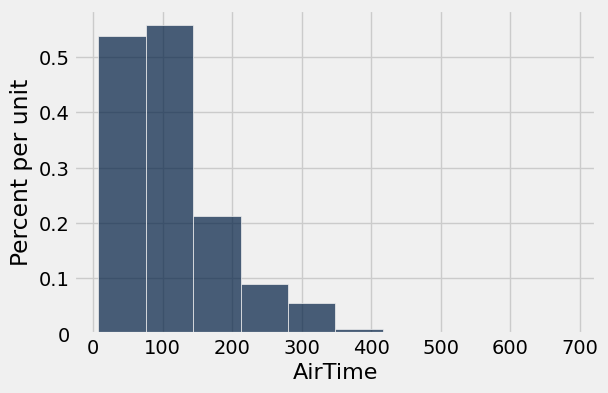

In [ ]:
airtimes.hist()

In [ ]:
airtimes[0].mean()

113.51162809012519

In [ ]:
percentile(50, airtimes[0])

94.0

# Problem 4

Sample size:  1
Population mean: 113.51162809
Average of sample means:  112.5896
Population SD: 72.2308152998
SD of sample means: 71.1540889327


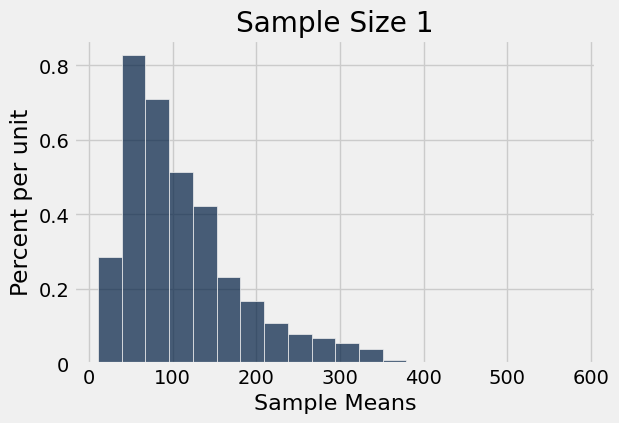

In [ ]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    means = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)

    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

simulate_sample_mean(airtimes, 'AirTime', 1, 10000)

This histogram is right skewed, like the distribution of the original data. This is expected because each "sample" is just one data point, meaning that the data is essentially the same as the data from the original histogram.

# Problem 5

Sample size:  5
Population mean: 113.51162809
Average of sample means:  113.57354
Population SD: 72.2308152998
SD of sample means: 32.4896267733


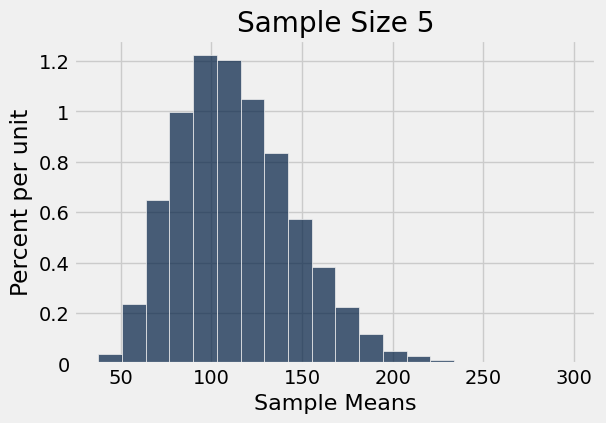

In [ ]:
simulate_sample_mean(airtimes, 'AirTime', 5, 10000)

This distribution is still right skewed, but a little less severly than the histogram from problem 4. This is exepected because although our samples are now actually samples, they are not big enough samples for the Central Limit Theorem to apply.

Sample size:  100
Population mean: 113.51162809
Average of sample means:  113.642006
Population SD: 72.2308152998
SD of sample means: 7.24049608632


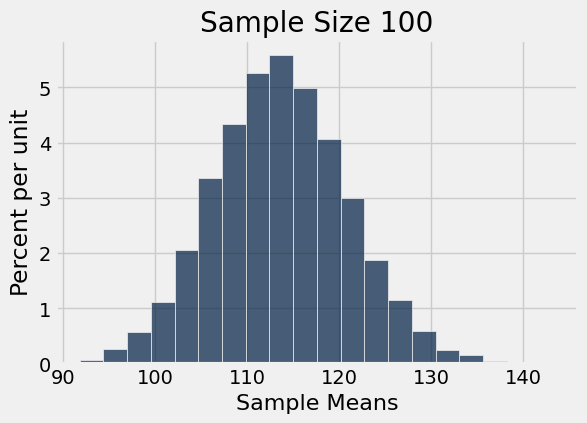

In [ ]:
simulate_sample_mean(airtimes, 'AirTime', 100, 10000)

This distribution is normal. This is to be expected because with samples of size 100, they are big enough for the Central Limit Theorem to apply.

# Problem 6

In [ ]:
pop_std = np.std(airtimes[0])
pop_std

72.230815299781042

In [ ]:
repetitions = 10000
sample_sizes = [1,5,100]

sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(airtimes.sample(n).column('AirTime')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_std/np.sqrt(sample_sizes)
)

sd_comparison

Sample Size n,"SD of 10,000 Sample Means",pop_sd/sqrt(n)
1,72.9656,72.2308
5,32.551,32.3026
100,7.23743,7.22308
